<a href="https://colab.research.google.com/github/Th20Vu/MIS515_Fall2024/blob/main/TV_Project_1_MBA_Admission_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ABOUT MBA Admission Dataset:
 https://www.kaggle.com/datasets/taweilo/mba-admission-dataset

*   Synthetic data generated from the Wharton Class of 2025's statistics
*   Includes 10 columns and 6194 rows



**I. Import Data:**

In [ ]:
# Import the 'files' module from Google Colab to upload files
from google.colab import files
uploaded = files.upload()

# Import pandas libary for data manipulation and analysis, 'pd' is used as an alias
import pandas as pd

# Calling read_csv function from pandas library to load MBA.csv file
admission_data = pd.read_csv('MBA.csv')

# Display the first 5 rows of the 'MBA.csv' to get an overview of the dataset.
print(admission_data.head())

Saving MBA.csv to MBA (1).csv
   application_id  gender  international   gpa       major      race   gmat  \
0               1  Female          False  3.30    Business     Asian  620.0   
1               2    Male          False  3.28  Humanities     Black  680.0   
2               3  Female           True  3.30    Business       NaN  710.0   
3               4    Male          False  3.47        STEM     Black  690.0   
4               5    Male          False  3.35        STEM  Hispanic  590.0   

   work_exp          work_industry admission  
0       3.0     Financial Services     Admit  
1       5.0  Investment Management       NaN  
2       5.0             Technology     Admit  
3       6.0             Technology       NaN  
4       5.0             Consulting       NaN  


**II. Data Cleaning:**

In [ ]:
# Replaces missing values in the 'race' columns by filling with 'International'
admission_data['race'] = admission_data['race'].fillna('International')

In [ ]:
# Replaces missing values in the 'admission' column by filling with 'Deny'
admission_data['admission'] = admission_data['admission'].fillna('Deny')

In [ ]:
# Drops rows with duplicate values if needed
admission_data = admission_data.drop_duplicates()

In [ ]:
# Analyze & check for outliers in 'gpa', 'gmat' and 'work_exp' columns
summary_stats = admission_data[['gpa','gmat', 'work_exp']].describe()
print(summary_stats)

               gpa         gmat     work_exp
count  6194.000000  6194.000000  6194.000000
mean      3.250714   651.092993     5.016952
std       0.151541    49.294883     1.032432
min       2.650000   570.000000     1.000000
25%       3.150000   610.000000     4.000000
50%       3.250000   650.000000     5.000000
75%       3.350000   680.000000     6.000000
max       3.770000   780.000000     9.000000


In [ ]:
# Show MBA Admission data after data cleaning
print(admission_data)

      application_id  gender  international   gpa       major           race  \
0                  1  Female          False  3.30    Business          Asian   
1                  2    Male          False  3.28  Humanities          Black   
2                  3  Female           True  3.30    Business  International   
3                  4    Male          False  3.47        STEM          Black   
4                  5    Male          False  3.35        STEM       Hispanic   
...              ...     ...            ...   ...         ...            ...   
6189            6190    Male          False  3.49    Business          White   
6190            6191    Male          False  3.18        STEM          Black   
6191            6192  Female           True  3.22    Business  International   
6192            6193    Male           True  3.36    Business  International   
6193            6194    Male          False  3.23        STEM       Hispanic   

       gmat  work_exp          work_ind

**III. Data visualization:**

In [ ]:
# Import the 'pyplot' module from Malplotlib for creating visualization, with the ability to add titles, lables, ticks and legends
import matplotlib.pyplot as plt
# Import the Seaborn Library for creating statistical visualization, such as count  plots and regression plots
import seaborn as sns

**1. Admission Outcome by the GMAT Score:**
    
*   **A count plot**, a type of **bar plot**, is used to display the admission outcome by the GMAT score ranges by counting the number of applicants.


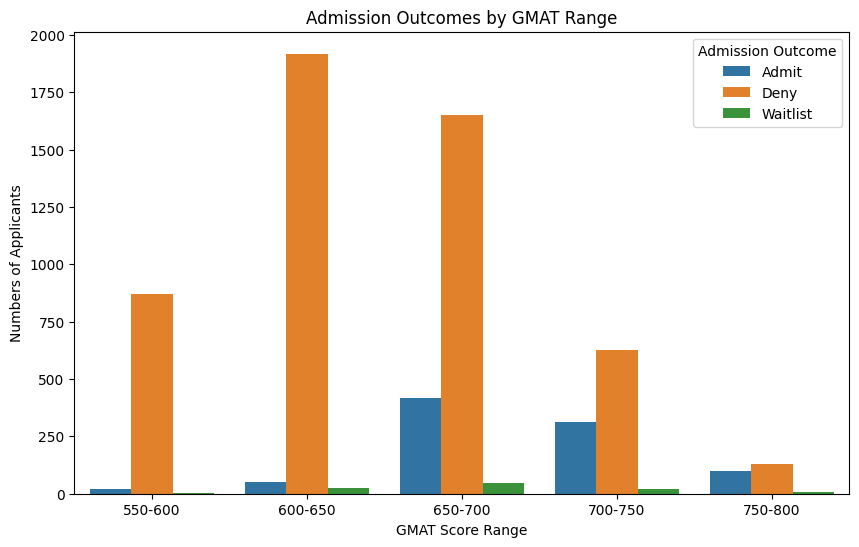

In [ ]:
# Create new column for GMAT score range by defining GMAT score bins and labels
gmat_bins = [550, 600, 650, 700, 750, 800]
gmat_labels = ['550-600', '600-650', '650-700', '700-750', '750-800']

# Use the cut function from pandas library to assign each GMAT score based set specific ranges from gmat bins and labels, creating a new 'gmat_range' column, and the inverval are left-inclusive
admission_data['gmat_range'] = pd.cut(admission_data['gmat'], bins=gmat_bins, labels=gmat_labels, right=False)

# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a count plot of the 'gmat_range' variable, with different colors bar representing admission outcomes (Admit, Deny, Waitlist)
sns.countplot(x='gmat_range', hue='admission', data=admission_data)

# Add the title of 'Admission Outcomes by GMAT Range' to the plot
plt.title('Admission Outcomes by GMAT Range')

# Name the x-axis as 'GMAT Score Range'
plt.xlabel('GMAT Score Range')

# Name the y-axis as 'Numbers of Applicants'
plt.ylabel('Numbers of Applicants')

# Set the rotation of x-ticks to 0 for horizontal orientation
plt.xticks(rotation=0)

# Add a lengend with the title 'Admission Outcome' to explain the bar color coding
plt.legend(title='Admission Outcome')

# Display the 'Admission Outcomes by GMAT Range' plot
plt.show()

**2. Correlation between GPA and GMAT**

*   **A regression plot**, a type of **scatter plot** with a regression line fitted to the data, is used to visualize the relationship between between GPA and GMAT scores.

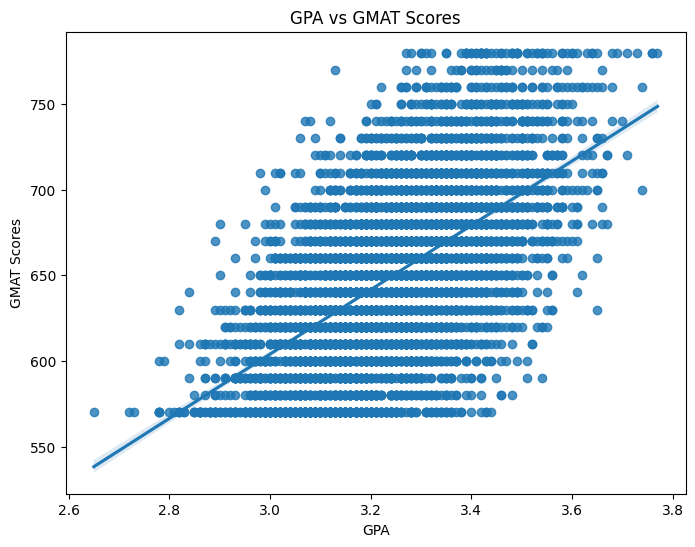

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Generate a regression plot, the regression line will show the trend of the relationship between GPA and GMAT scores
sns.regplot(x='gpa', y='gmat', data=admission_data)

# Create the title 'GPA vs GMAT Scores' of  to the plot
plt.title('GPA vs GMAT Scores')

# Label the x-axis as 'GPA'
plt.xlabel('GPA')

# Lable the y-axis as 'GMAT Scores'
plt.ylabel('GMAT Scores')

# Display the 'GPA vs GMAT Scores' plot
plt.show()

**3. Heatmap of Applicants by Work Industry and Major**

*   **A heatmap** is used to visualize which industries and majors have the most overlap in term of applicants. Heatmap showing the number of applicants by work industry and major

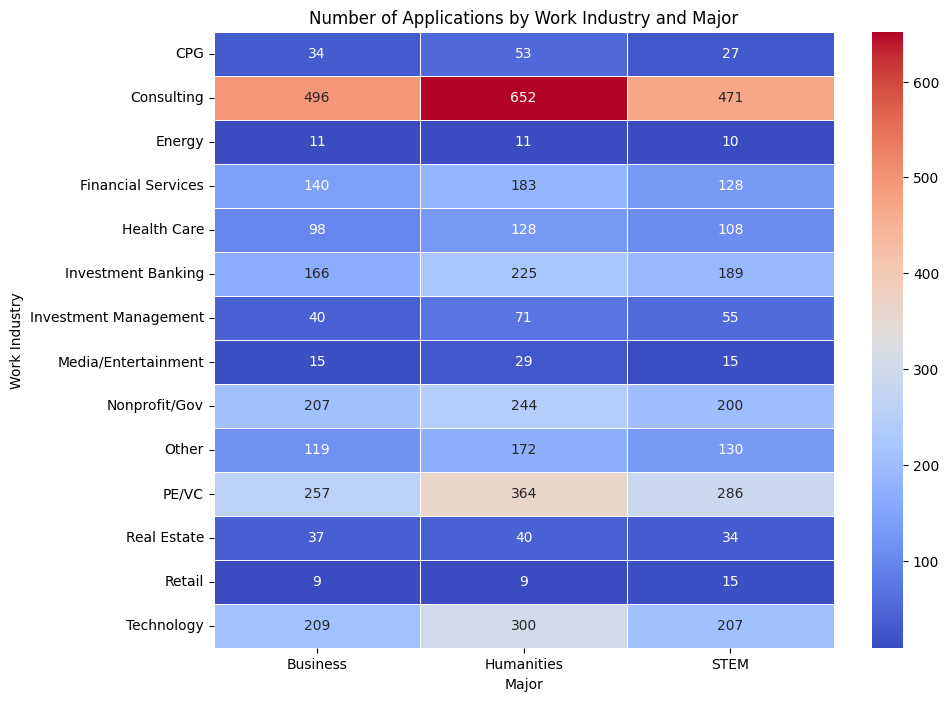

In [ ]:
# Group by 'major' and 'gender', and count the number of applications for each group
major_industry_counts = admission_data.groupby(['work_industry','major']).size().unstack().fillna(0)

# Set the figure size for the plot
plt.figure(figsize=(10,8))

# Plotting the heatmap using heatmap function from Seaborn library with numerical annotations added to each cell in the heatmap. The count of applicants grouped by work industry and major are being visualized in this heat map and formated as a whole numbers with fmt='.0f'
sns.heatmap(major_industry_counts, annot=True, fmt='.0f', cmap='coolwarm', linewidths=0.5)

# Set the title for the plot
plt.title('Number of Applications by Work Industry and Major')

# Label the x-axis
plt.xlabel('Major')

# Label the y-axis
plt.ylabel('Work Industry')

# Display the plot
plt.show()

**4. Admission Rate by Gender and Work Experience**

*   **A line chart** is used to provide a comparison view of how admission rates vary between genders as work experience increases.



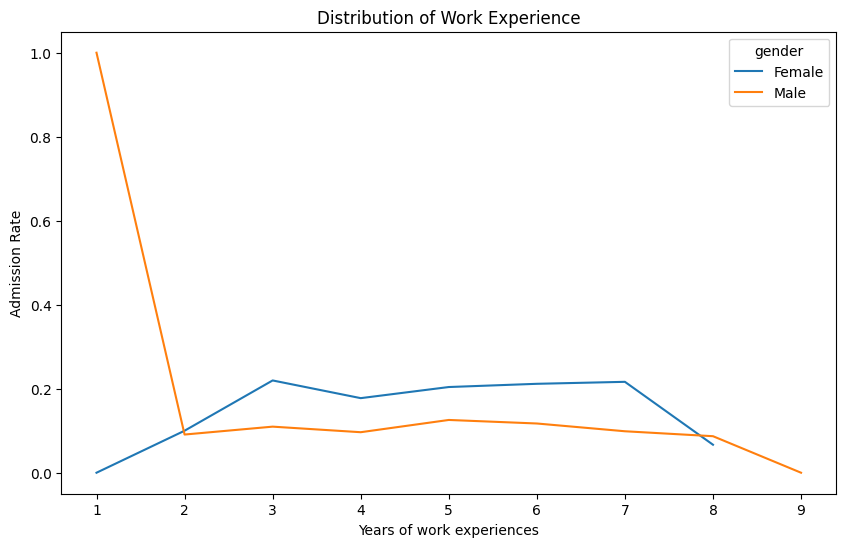

In [ ]:
# Create a binary result for admission (1 for Admit, 0 for Deny/Waitlist)
admission_data['admission_rate'] = admission_data['admission'].apply(lambda x:1 if x == 'Admit' else 0)

# Group by year of work experience and gender, and calculate the mean of admission rate for each group
admission_by_gender_year = admission_data.groupby(['work_exp', 'gender'])['admission_rate'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10,6))

# Create the line plot showing admission rate by gender and year of work experiences
sns.lineplot(x='work_exp', y='admission_rate', hue='gender', data=admission_by_gender_year)

# Set the title of the plot
plt.title('Distribution of Work Experience')

# Label the x-axis
plt.xlabel('Years of work experiences')

# Label the y-axis
plt.ylabel('Admission Rate')

# Display the line chart
plt.show()

**5. Distribution of International Applicants by Major**

*   **A pie chart** is used to show the distribution of internation applicants by major.

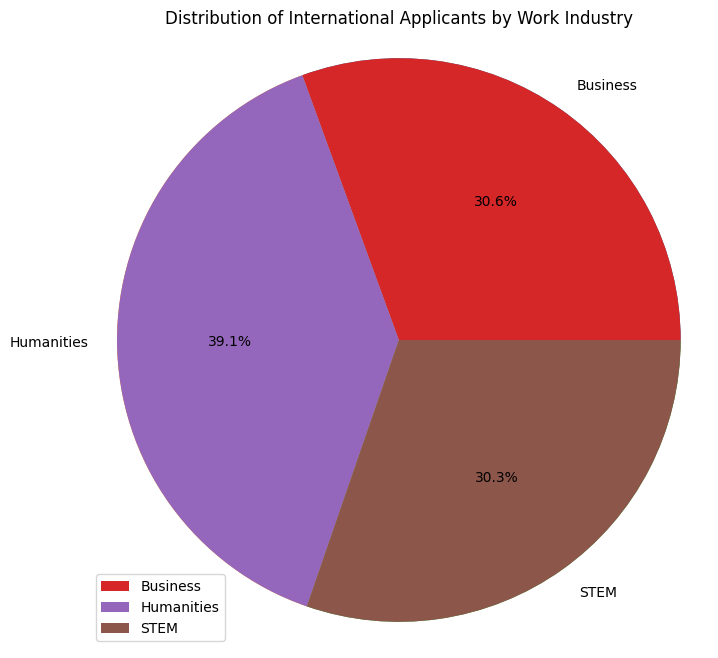

In [ ]:
# Filter the dataset for only international students
i_students = admission_data[admission_data['international'] == True]

# Group by major and calculate the number of internation students by major
is_by_major = i_students.groupby('major').size().reset_index(name='count')

# Create a pie chart for the distribution of international applicants by major
plt.figure(figsize=(8,8))
plt.pie(is_by_major['count'], labels=is_by_major['major'], autopct='%1.1f%%')

# Set title
plt.title('Distribution of International Applicants by Work Industry')

# Set legend
patches, texts = plt.pie(is_by_major['count'])
plt.legend(patches, is_by_major['major'], loc="lower left")

# Set axes to be equal to produce a perfectly circular chart
plt.axis('equal')

# Show the pie chart
plt.show()